# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes
'Age': cutomer age in years
'Area Income': Avg. Income of geographical area of consumer
'Daily Internet Usage': Avg. minutes a day consumer is on the internet
'Ad Topic Line': Headline of the advertisement
'City': City of consumer
'Male': Whether or not consumer was male
'Country': Country of consumer
'Timestamp': Time at which consumer clicked on Ad or closed window
'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the data

In [2]:
ad_data = pd.read_csv("advertising.csv")

In [3]:
ad_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Explore the data

[Text(0.5, 1.0, 'Distribution of Age')]

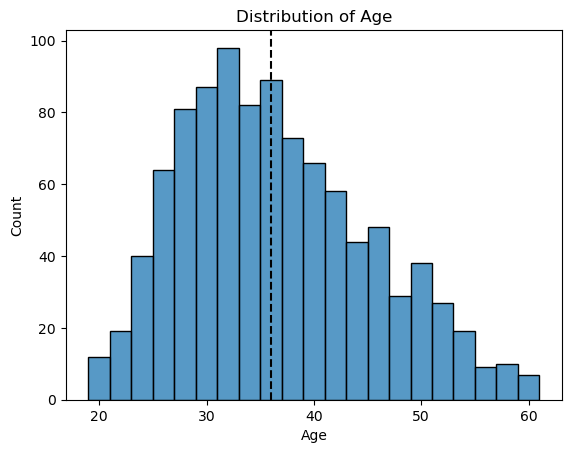

In [16]:
ax = sns.histplot(data = ad_data, x = 'Age', binwidth=2)

ax.axvline(x = ad_data['Age'].mean(),  
           ymin = 0, # Bottom of the plot
           ymax = 1,
          color = 'black',
          ls = 'dashed') # Top of the plot

ax.set(title = "Distribution of Age")

C:\Users\MarkWooten\AppData\Local\Temp\ipykernel_39224\1779486868.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


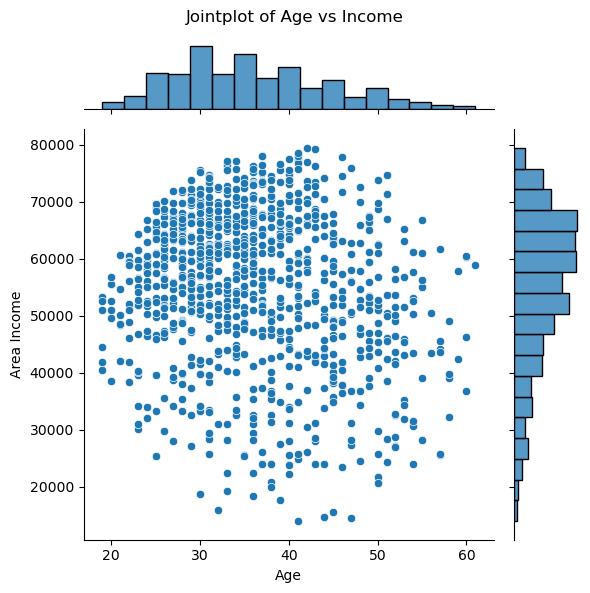

In [25]:
sns.jointplot(data = ad_data, x = 'Age', y = 'Area Income')

plt.suptitle("Jointplot of Age vs Income")
plt.tight_layout()

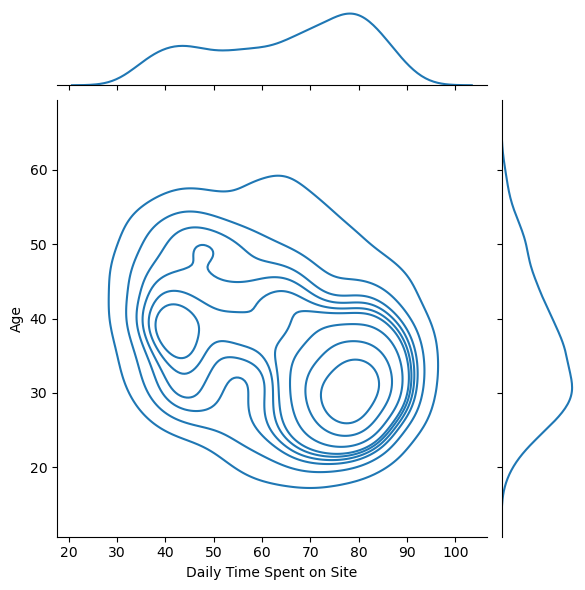

In [30]:
sns.jointplot(data = ad_data, x = 'Daily Time Spent on Site', y = 'Age', kind = 'kde', palette='flare')

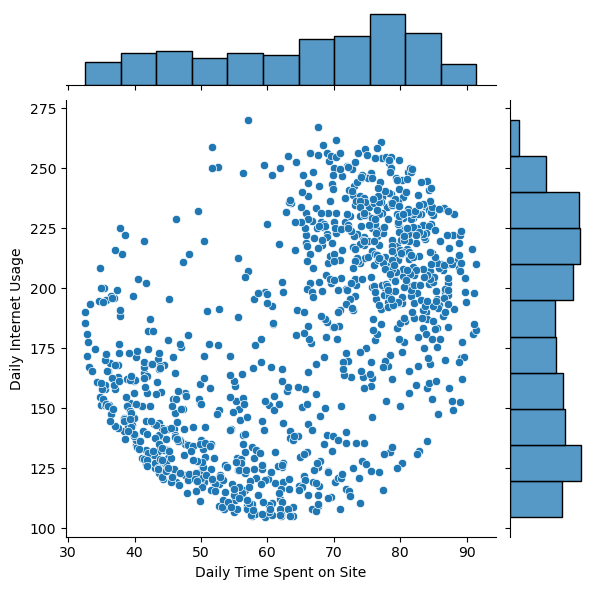

In [31]:
sns.jointplot(data = ad_data, x = 'Daily Time Spent on Site', y = 'Daily Internet Usage')

C:\Users\MarkWooten\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\MarkWooten\AppData\Local\Temp\ipykernel_39224\615857870.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


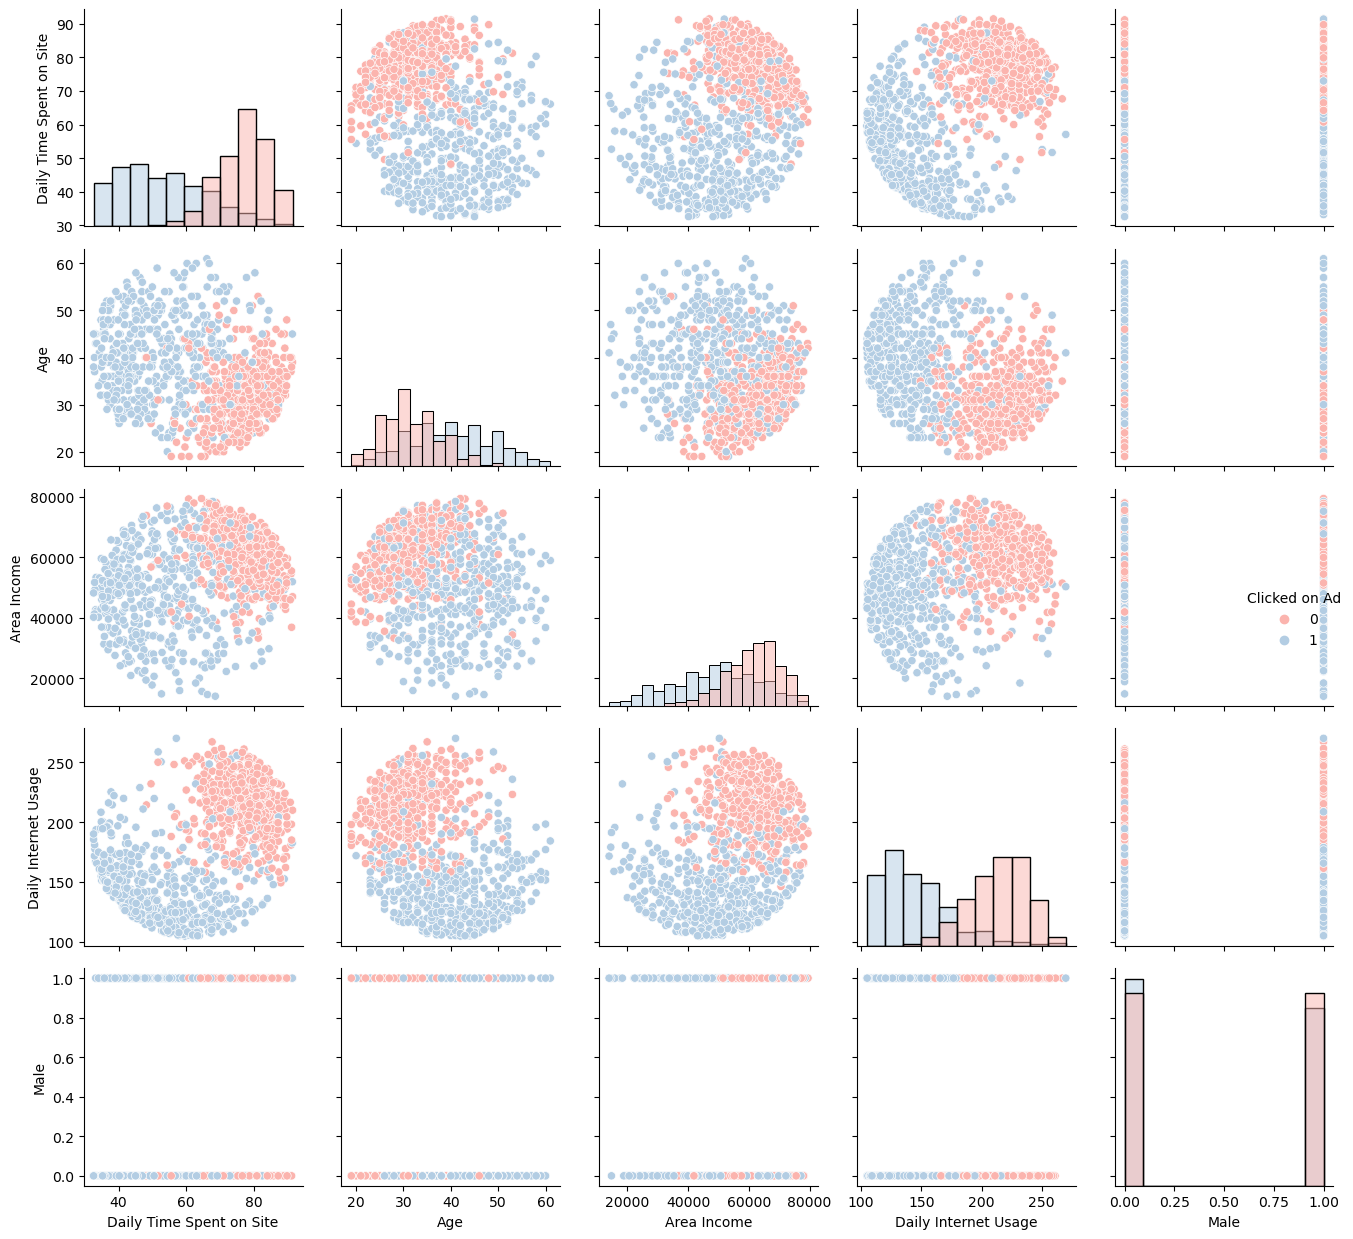

In [36]:
sns.pairplot(data = ad_data, hue = 'Clicked on Ad', palette='Pastel1', diag_kind='hist')
plt.tight_layout()

When colored by those who clicked on the ad and those who did not, there seem to be some clear delineations. This seems promising for a logistic regression! 

<Axes: >

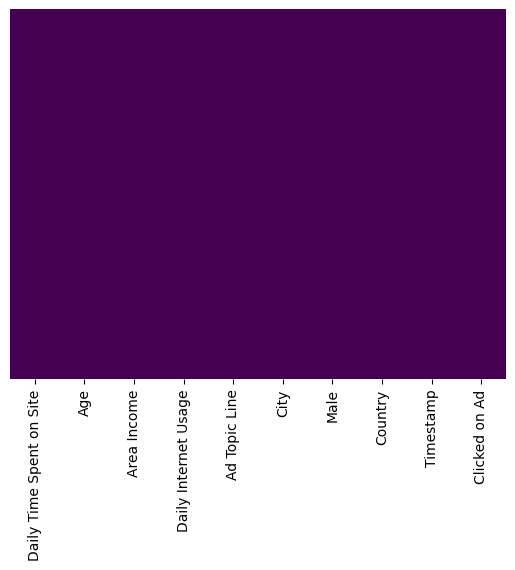

In [37]:
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing data. That's nice!

# Train the Model

In [39]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop(['Clicked on Ad','Ad Topic Line',
                                                                  'City','Country','Timestamp'],axis=1), 
                                                    ad_data['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [47]:
predictions = logmodel.predict(X_test)

# Evaluate the Model

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

